In [5]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas
from shapely.geometry import Point, LineString, Polygon
from dateutil.parser import parse
import requests 
import json
from io import StringIO
# these are all things that might be currently needed 

In [2]:
r=requests.get('https://data.sfgov.org/resource/wr8u-xric.json')

In [ ]:
df_base=pd.read_json(StringIO(json.dumps(r.json())))
# this should be replaced the file is very large  to be on github INGORE 

In [ ]:
new_df=df_base[df_base['Primary Situation'].apply(lambda x:str(x).split(" ")[0] )=='700']
new_df['year']=new_df['Incident Date'].apply(lambda x:parse(x).year)
new_df['month']=new_df['Incident Date'].apply(lambda x:parse(x).month)

C:\Users\griff\AppData\Local\Temp\ipykernel_12512\3538051912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['year']=new_df['Incident Date'].apply(lambda x:parse(x).year)
C:\Users\griff\AppData\Local\Temp\ipykernel_12512\3538051912.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['month']=new_df['Incident Date'].apply(lambda x:parse(x).month)


In [127]:
new_df[new_df['Incident Number']==25000002]

,Incident Number,Exposure Number,ID,Address,Incident Date,Call Number,Alarm DtTm,Arrival DtTm,Close DtTm,City,...,Automatic Extinguishing Sytem Perfomance,Automatic Extinguishing Sytem Failure Reason,Number of Sprinkler Heads Operating,Supervisor District,neighborhood_district,point,data_as_of,data_loaded_at,year,month
0,25000002,0,250000020,701 3RD STREET,2025/01/01,250010047,2025/01/01 12:10:02 AM,2025/01/01 12:13:29 AM,2025/01/01 12:23:17 AM,San Francisco,...,NaN,NaN,NaN,6.0,Mission Bay,POINT (-122.392309 37.778763),2025/01/01 12:23:17 AM,2025/09/19 02:19:08 AM,2025,1


In [4]:
df_one=new_df[['Incident Date','ID','neighborhood_district','Incident Number','year','month']]

In [7]:
df_one.groupby(['Incident Number'])

In [11]:
df_one

,Incident Date,ID,neighborhood_district,Incident Number,year,month
0,2025/01/01,250000020,Mission Bay,25000002,2025,1
4,2025/01/01,250000270,Inner Sunset,25000027,2025,1
21,2025/01/01,250001020,Castro/Upper Market,25000102,2025,1
26,2025/01/01,250001230,Chinatown,25000123,2025,1
28,2025/01/01,250001290,South of Market,25000129,2025,1
...,...,...,...,...,...,...
24819,2025/09/16,251318120,Pacific Heights,25131812,2025,9
24838,2025/09/16,251319580,Pacific Heights,25131958,2025,9
24858,2025/09/16,251321490,Inner Sunset,25132149,2025,9
24892,2025/09/17,251324750,West of Twin Peaks,25132475,2025,9


In [ ]:
sns.P

AttributeError: module 'seaborn' has no attribute 'Plot'

In [23]:
df_one

,Incident Date,ID,neighborhood_district,Incident Number
0,2025/01/01,250000020,Mission Bay,25000002
4,2025/01/01,250000270,Inner Sunset,25000027
21,2025/01/01,250001020,Castro/Upper Market,25000102
26,2025/01/01,250001230,Chinatown,25000123
28,2025/01/01,250001290,South of Market,25000129
...,...,...,...,...
24819,2025/09/16,251318120,Pacific Heights,25131812
24838,2025/09/16,251319580,Pacific Heights,25131958
24858,2025/09/16,251321490,Inner Sunset,25132149
24892,2025/09/17,251324750,West of Twin Peaks,25132475


<Axes: xlabel='Incident Date', ylabel='Incident Number'>

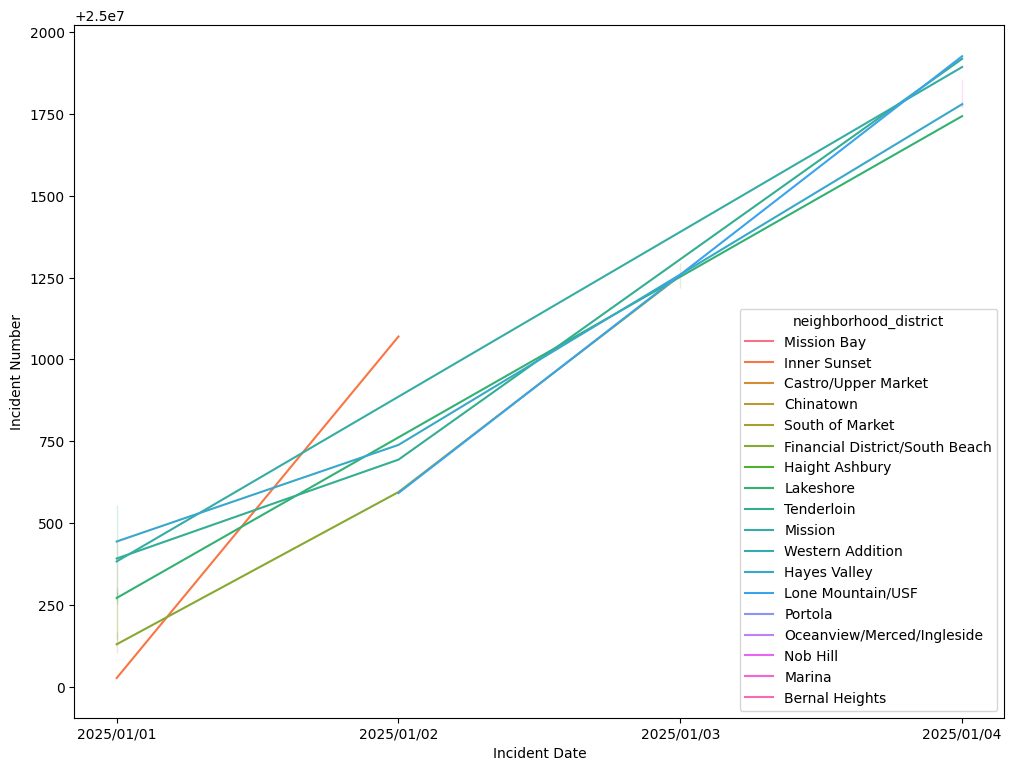

In [5]:
df_amounts=df_one.groupby(['neighborhood_district','Incident Date'],as_index=False)['Incident Number'].count()

In [6]:
df_amounts

,neighborhood_district,Incident Date,Incident Number
0,Bayview Hunters Point,2025/01/06,1
1,Bayview Hunters Point,2025/01/09,1
2,Bayview Hunters Point,2025/01/17,2
3,Bayview Hunters Point,2025/01/21,1
4,Bayview Hunters Point,2025/01/22,1
...,...,...,...
2151,Western Addition,2025/08/28,1
2152,Western Addition,2025/08/31,1
2153,Western Addition,2025/09/03,1
2154,Western Addition,2025/09/14,1


In [94]:
df_one.groupby(['neighborhood_district','Incident Date'])

In [7]:
df_amounts.columns=[['neighborhood_district','Incident Date','Incident amount']]

In [60]:
df_a=df_amounts.reset_index()

[np.int64(1),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(3),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(4),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(2),
 np.in

In [52]:
df_data=pd.DataFrame({"place":[item[0] for item in df_amounts['neighborhood_district'].values],
              "date":[item[0] for item in df_amounts['Incident Date'].values],
             "amount":[item[0] for item in df_amounts['Incident amount'].values]})

In [53]:
df_data

,place,date,amount
0,Bayview Hunters Point,2025/01/06,1
1,Bayview Hunters Point,2025/01/09,1
2,Bayview Hunters Point,2025/01/17,2
3,Bayview Hunters Point,2025/01/21,1
4,Bayview Hunters Point,2025/01/22,1
...,...,...,...
2151,Western Addition,2025/08/28,1
2152,Western Addition,2025/08/31,1
2153,Western Addition,2025/09/03,1
2154,Western Addition,2025/09/14,1


In [11]:
df_data[df_data['place'].apply(lambda x:x=="Bayview Hunters Point")]

,place,date,amount
0,Bayview Hunters Point,2025/01/06,1
1,Bayview Hunters Point,2025/01/09,1
2,Bayview Hunters Point,2025/01/17,2
3,Bayview Hunters Point,2025/01/21,1
4,Bayview Hunters Point,2025/01/22,1
...,...,...,...
68,Bayview Hunters Point,2025/08/28,1
69,Bayview Hunters Point,2025/08/29,1
70,Bayview Hunters Point,2025/08/31,2
71,Bayview Hunters Point,2025/09/03,4


In [51]:
df_data

,place,date,amount,moving_amoumt,moving_sum
0,Bayview Hunters Point,2025/01/06,1,0.00,0.0
1,Bayview Hunters Point,2025/01/09,1,0.00,0.0
2,Bayview Hunters Point,2025/01/17,2,0.00,0.0
3,Bayview Hunters Point,2025/01/21,1,1.25,5.0
4,Bayview Hunters Point,2025/01/22,1,1.25,5.0
...,...,...,...,...,...
2151,Western Addition,2025/08/28,1,1.25,5.0
2152,Western Addition,2025/08/31,1,1.25,5.0
2153,Western Addition,2025/09/03,1,1.00,4.0
2154,Western Addition,2025/09/14,1,1.00,4.0


<Axes: xlabel='date', ylabel='amount'>

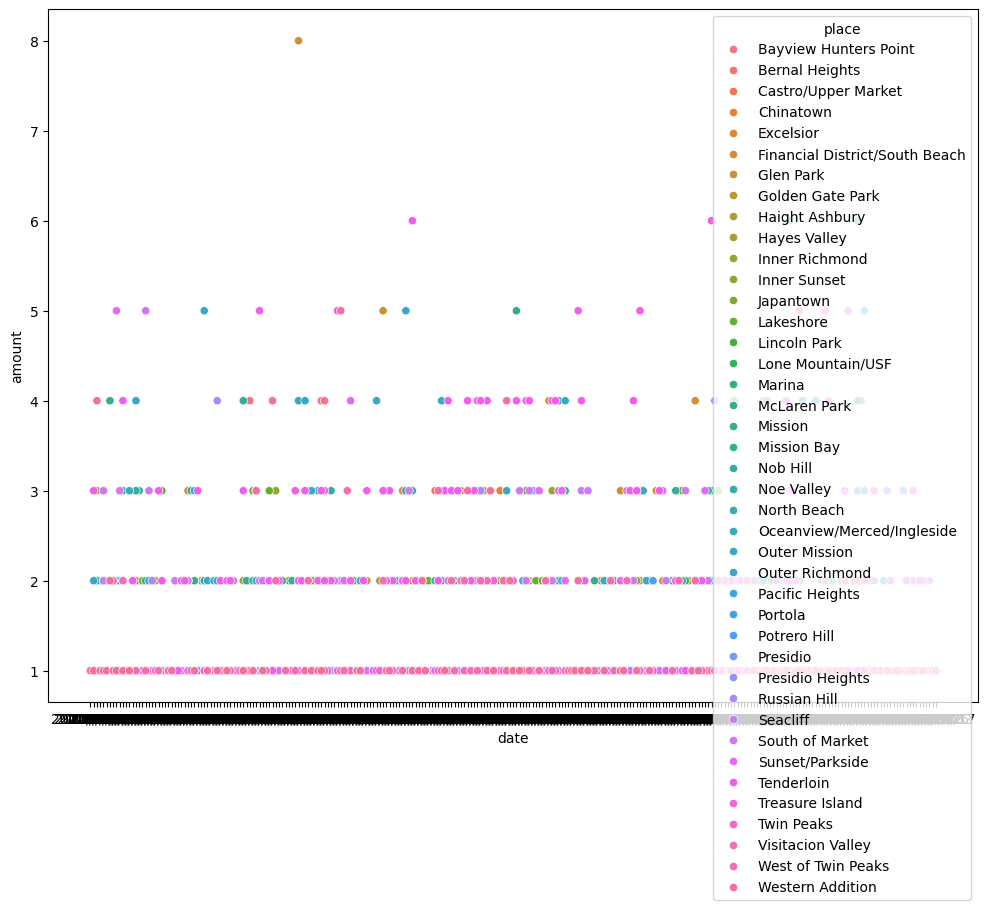

In [50]:
plt.figure(figsize=(12, 9))
sns.scatterplot(df_data,x='date',y='amount',hue='place')

<Axes: xlabel='date', ylabel='amount'>

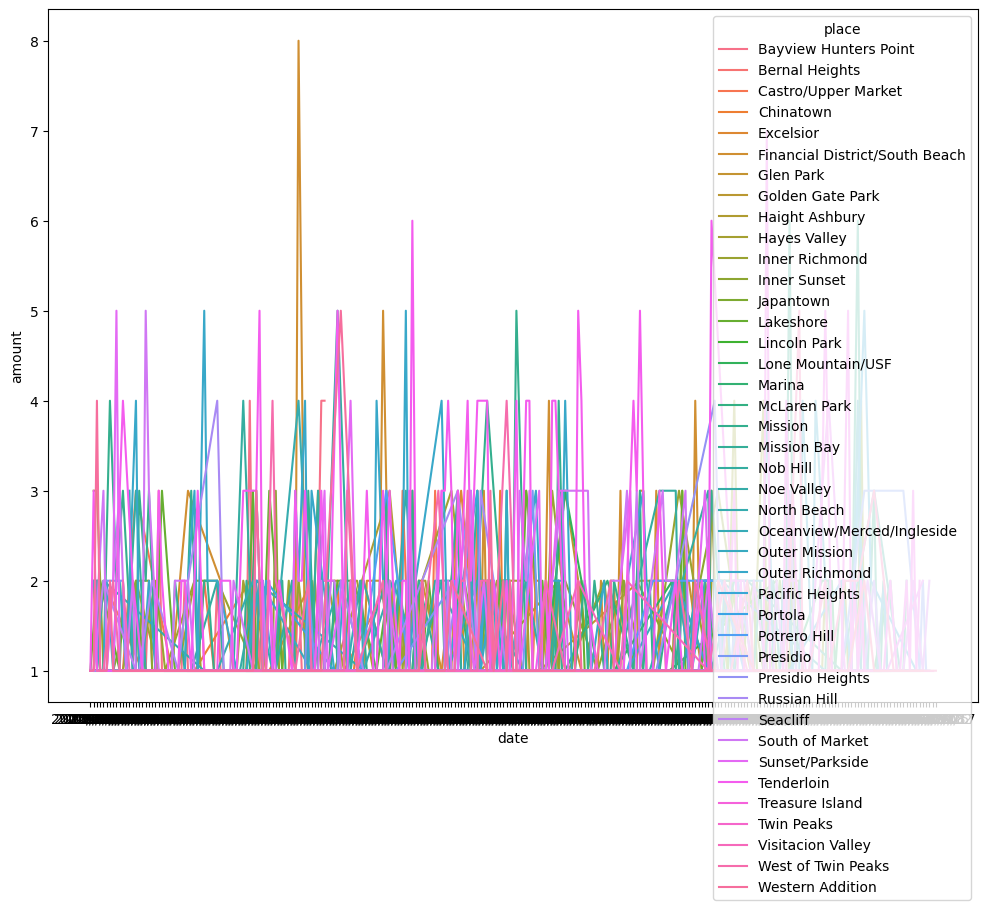

In [39]:
plt.figure(figsize=(12, 9))
sns.lineplot(df_data,x='date',y='amount',hue='place')

In [19]:
df_data

,place,date,amount
0,Bayview Hunters Point,2025/01/06,1
1,Bayview Hunters Point,2025/01/09,1
2,Bayview Hunters Point,2025/01/17,2
3,Bayview Hunters Point,2025/01/21,1
4,Bayview Hunters Point,2025/01/22,1
...,...,...,...
2151,Western Addition,2025/08/28,1
2152,Western Addition,2025/08/31,1
2153,Western Addition,2025/09/03,1
2154,Western Addition,2025/09/14,1


In [54]:
x=df_data['amount'].rolling(4).mean()
y=df_data['amount'].rolling(4).sum()
x=x.fillna(0)
y=y.fillna(0)

In [55]:
df_data['moving_amoumt']=x
df_data['moving_sum']=y

In [60]:
df_data.place.unique()

array(['Bayview Hunters Point', 'Bernal Heights', 'Castro/Upper Market',
       'Chinatown', 'Excelsior', 'Financial District/South Beach',
       'Glen Park', 'Golden Gate Park', 'Haight Ashbury', 'Hayes Valley',
       'Inner Richmond', 'Inner Sunset', 'Japantown', 'Lakeshore',
       'Lincoln Park', 'Lone Mountain/USF', 'Marina', 'McLaren Park',
       'Mission', 'Mission Bay', 'Nob Hill', 'Noe Valley', 'North Beach',
       'Oceanview/Merced/Ingleside', 'Outer Mission', 'Outer Richmond',
       'Pacific Heights', 'Portola', 'Potrero Hill', 'Presidio',
       'Presidio Heights', 'Russian Hill', 'Seacliff', 'South of Market',
       'Sunset/Parkside', 'Tenderloin', 'Treasure Island', 'Twin Peaks',
       'Visitacion Valley', 'West of Twin Peaks', 'Western Addition'],
      dtype=object)

<Axes: xlabel='moving_sum', ylabel='amount'>

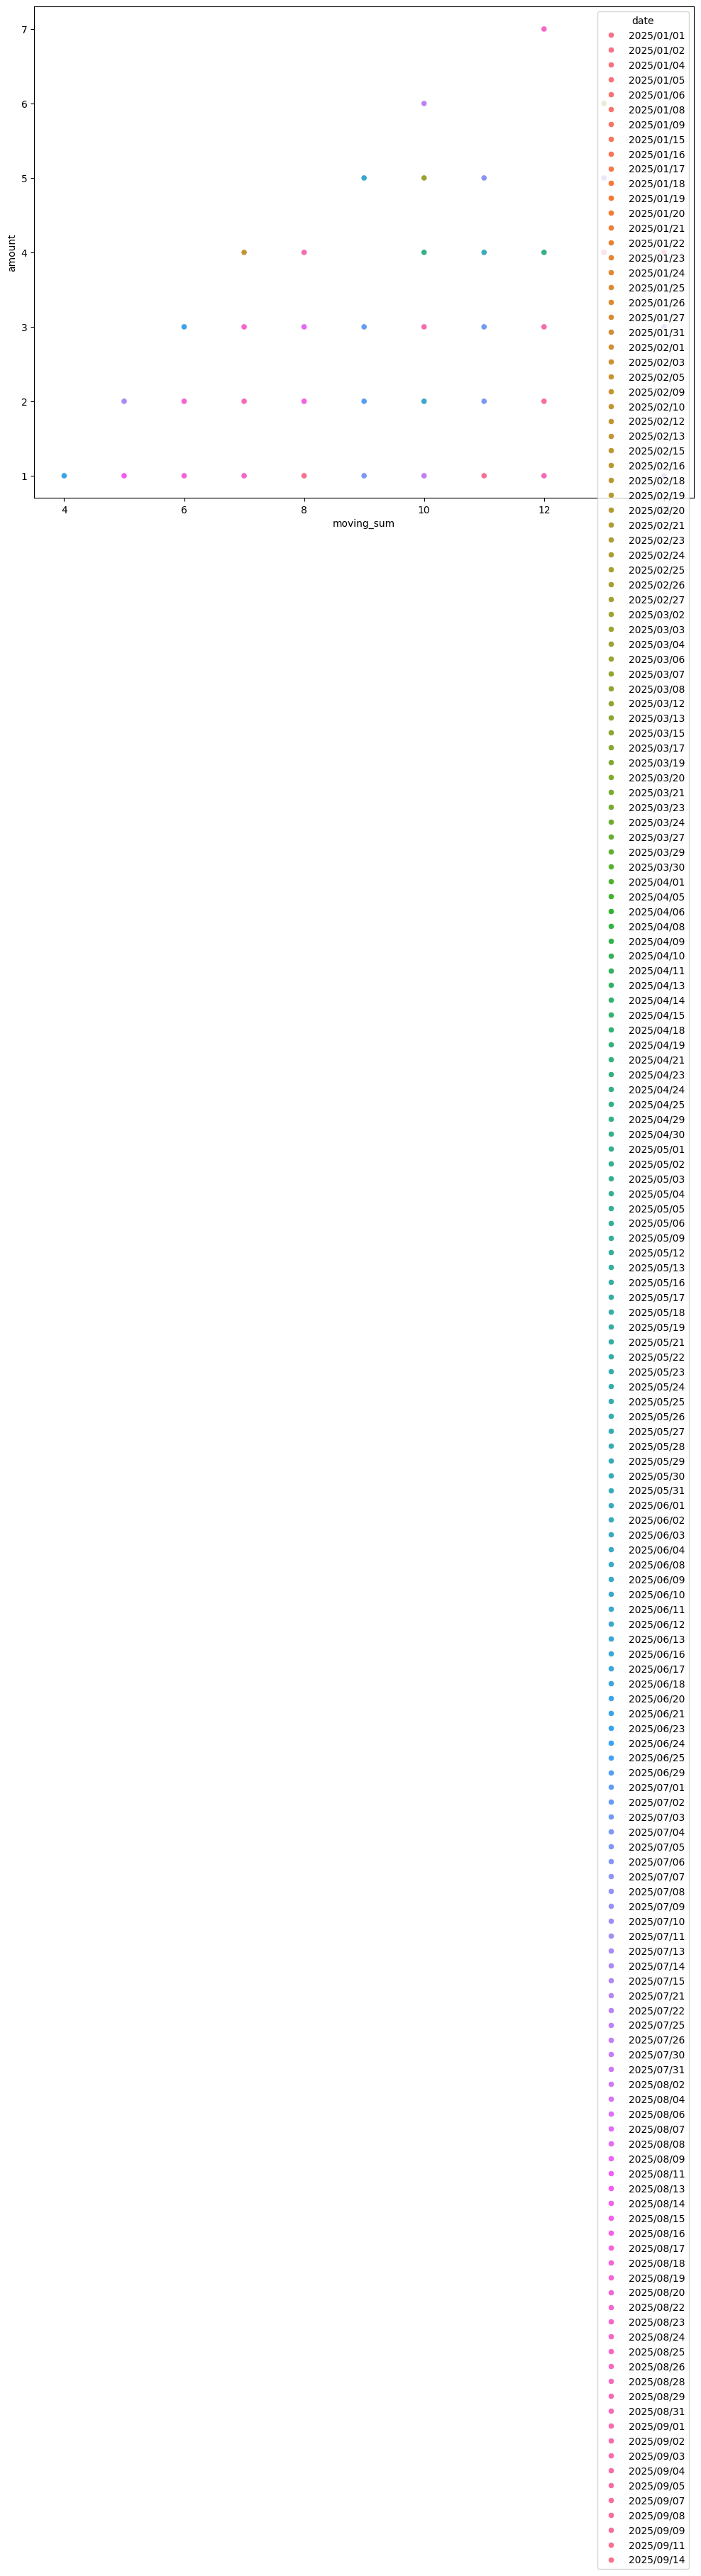

In [62]:
plt.figure(figsize=(12, 9))
sns.scatterplot(df_data[df_data['place']=='Tenderloin'],x='moving_sum',y='amount',hue='date')

In [64]:
df_data.to_csv('new_test.csv',index=False)

<Axes: xlabel='date', ylabel='moving_sum'>

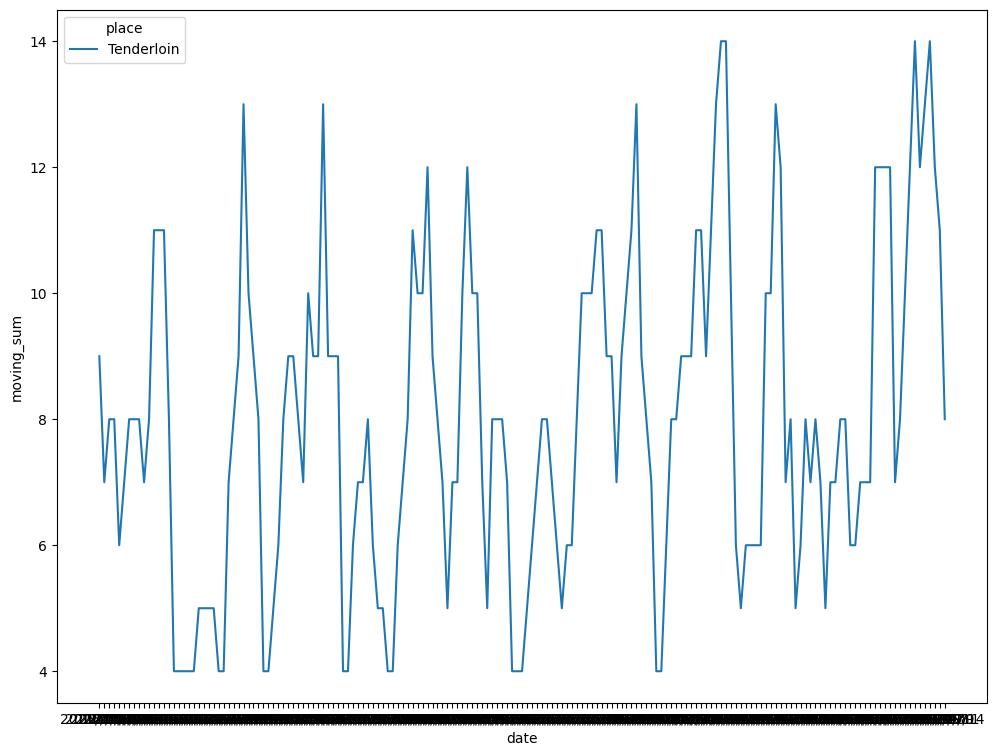

In [63]:
plt.figure(figsize=(12, 9))
sns.lineplot(df_data[df_data['place']=='Tenderloin'],x='date',y='moving_sum',hue='place')

<Axes: xlabel='date', ylabel='moving_sum'>

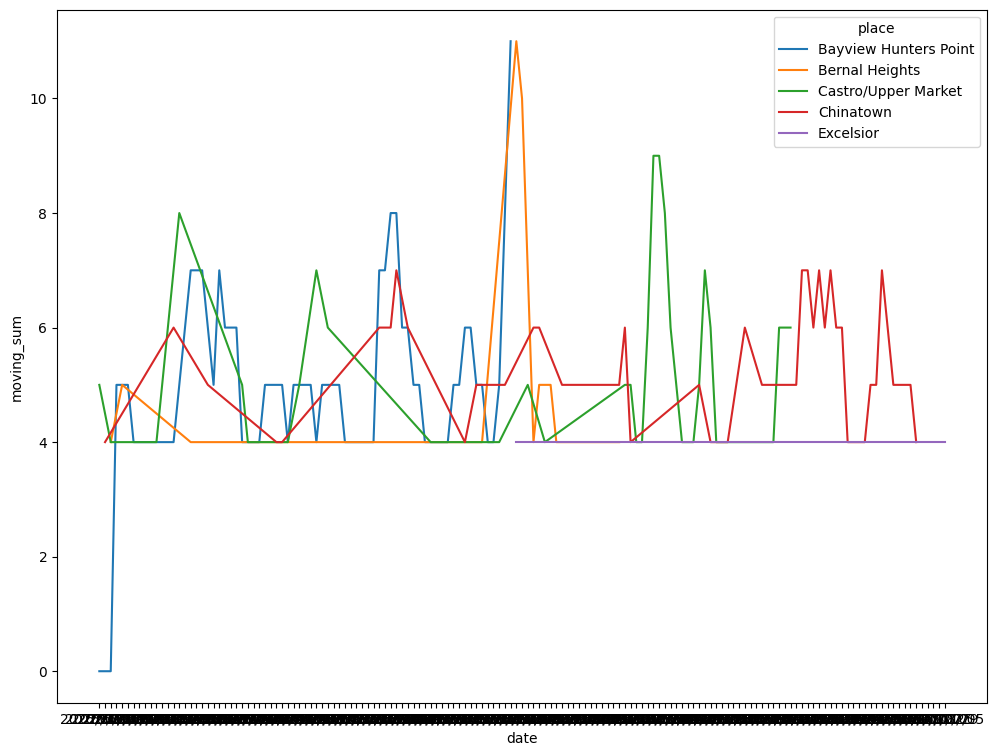

In [ ]:
plt.figure(figsize=(12, 9))
sns.lineplot(df_data[0:200],x='date',y='moving_sum',hue='place')

In [21]:
x.fillna(0)

0       0.0
1       1.0
2       1.5
3       1.5
4       1.0
       ... 
2151    1.0
2152    1.0
2153    1.0
2154    1.0
2155    1.0
Name: amount, Length: 2156, dtype: float64

In [24]:
df_amounts['neighborhood_district'].unique()

AttributeError: 'DataFrame' object has no attribute 'unique'

In [ ]:
df_amounts.to_csv('test_table.csv',index=False)
['neighborhood_district']=='Bayview Hunters Point'

,neighborhood_district,Incident Date,Incident Number
0,Bayview Hunters Point,2025/01/06,1
1,Bayview Hunters Point,2025/01/09,1
2,Bayview Hunters Point,2025/01/17,2
3,Bayview Hunters Point,2025/01/21,1
4,Bayview Hunters Point,2025/01/22,1
...,...,...,...
2151,Western Addition,2025/08/28,1
2152,Western Addition,2025/08/31,1
2153,Western Addition,2025/09/03,1
2154,Western Addition,2025/09/14,1


In [59]:
plt.figure(figsize=(12, 9))
sns.lineplot(df_a,x='Incident Date',y='Incident Number',hue='neighborhood_district')

ValueError: Could not interpret value `Incident Number` for `y`. An entry with this name does not appear in `data`.

<Figure size 1200x900 with 0 Axes>

In [64]:
df_amounts

,neighborhood_district,Incident Date,Incident amount
0,Bayview Hunters Point,2025/01/06,1
1,Bayview Hunters Point,2025/01/09,1
2,Bayview Hunters Point,2025/01/17,2
3,Bayview Hunters Point,2025/01/21,1
4,Bayview Hunters Point,2025/01/22,1
...,...,...,...
2151,Western Addition,2025/08/28,1
2152,Western Addition,2025/08/31,1
2153,Western Addition,2025/09/03,1
2154,Western Addition,2025/09/14,1


In [65]:

sns.lineplot(df_amounts,x='Incident Date',y='Incident amount')

ValueError: If using all scalar values, you must pass an index